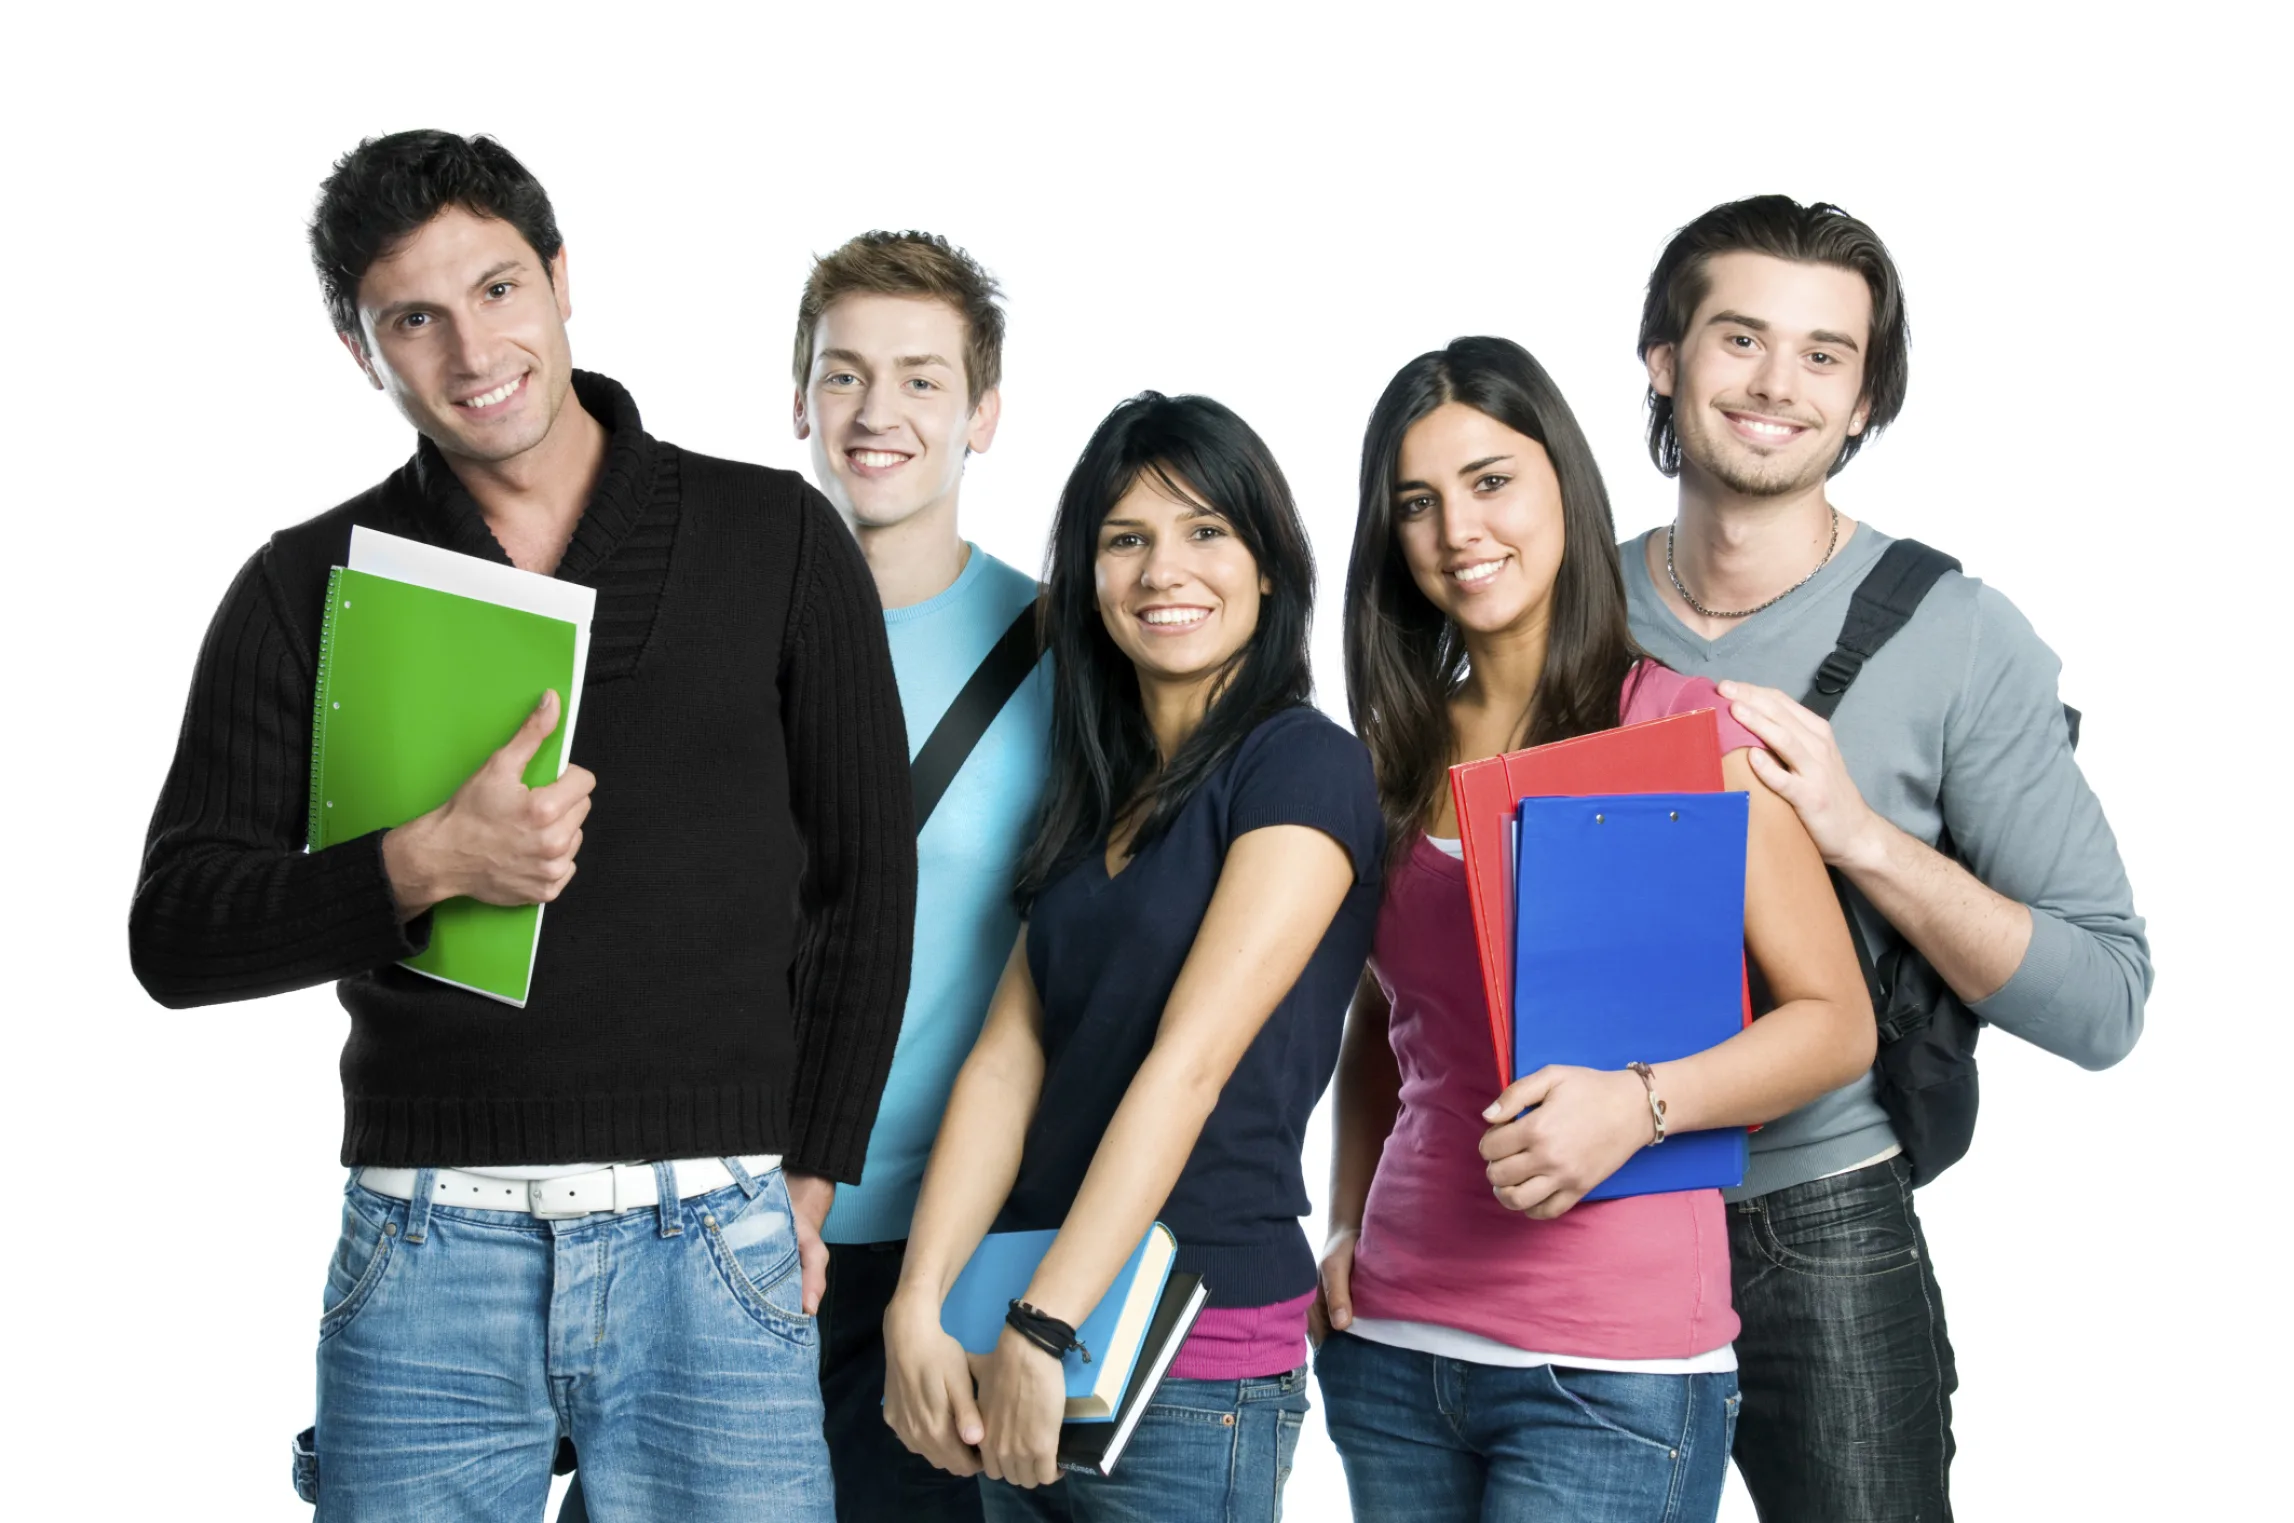

**Current research was been doing for analysis of students marks and correlation between groups**

`Data set` consists of the marks secured by the students in various subjects.

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [1]:
import numpy as np        
import pandas as pd        
from scipy import stats    
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
%matplotlib inline

In [3]:
data = pd.read_csv(r'study_performance.csv')

In [5]:
data.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Let find out what are means of math, reading and writing `scores`

In [36]:
scores = columns[len(columns) - 3:]
for column in scores:
    print(f'{column.replace("_", " ").capitalize()} mean equals {np.mean(data[column])}')

Math score mean equals 66.089
Reading score mean equals 69.169
Writing score mean equals 68.054


Find `max/min` of scores of each gender

In [37]:
men = data[data['gender'] == 'male']
women = data[data['gender'] == 'female']
for column in scores:
    print(f'{column.replace("_", " ").capitalize()} max from male = {men[column].max()}, min = {men[column].min()}')
    print(f'{column.replace("_", " ").capitalize()} max from female = {women[column].max()}, min = {women[column].min()}')

Math score max from male = 100, min = 27
Math score max from female = 100, min = 0
Reading score max from male = 100, min = 23
Reading score max from female = 100, min = 17
Writing score max from male = 100, min = 15
Writing score max from female = 100, min = 10


Find `mean` of scores of each gender

In [40]:
men = data[data['gender'] == 'male']
women = data[data['gender'] == 'female']
for column in scores:
    print(f'{column.replace("_", " ").capitalize()} mean from male = {men[column].mean()}')
    print(f'{column.replace("_", " ").capitalize()} mean from female = {women[column].mean()}')

Math score mean from male = 68.72821576763485
Math score mean from female = 63.633204633204635
Reading score mean from male = 65.47302904564316
Reading score mean from female = 72.60810810810811
Writing score mean from male = 63.31120331950208
Writing score mean from female = 72.46718146718146


[68.72821576763485,
 63.633204633204635,
 65.47302904564316,
 72.60810810810811,
 63.31120331950208,
 72.46718146718146]

`Box plot` of means every score of every gender

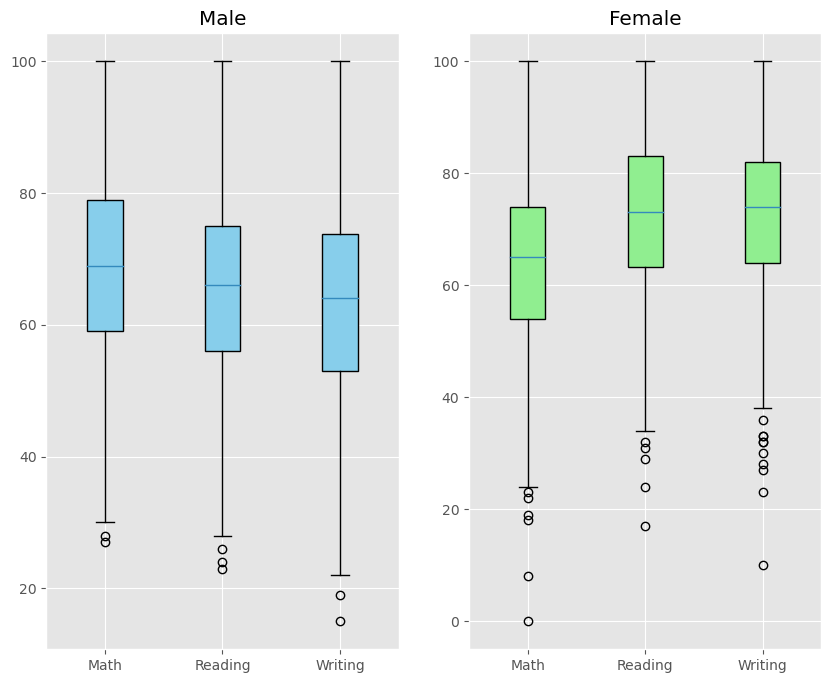

In [55]:
men_sc = [men[column] for column in scores]
women_sc = [women[column] for column in scores]
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].boxplot(men_sc, patch_artist=True, boxprops=dict(facecolor="skyblue"), labels=['Math', 'Reading', 'Writing'])
axs[1].boxplot(women_sc, patch_artist=True, boxprops=dict(facecolor="lightgreen"), labels=['Math', 'Reading', 'Writing']);
axs[0].set_title('Male')
axs[1].set_title('Female');

How luch effect on `students` marks?

In [64]:
data.groupby('lunch')[scores].agg([np.max, np.mean, np.median])

math_score                   reading_score                    \
                   amax       mean median          amax       mean median   
lunch                                                                       
free/reduced        100  58.921127   60.0           100  64.653521   65.0   
standard            100  70.034109   69.0           100  71.654264   72.0   

             writing_score                    
                      amax       mean median  
lunch                                         
free/reduced           100  63.022535   64.0  
standard               100  70.823256   72.0

We can see that `students` that have standart type of lunch, obtain higher marks than students with free or reduced type of lunch.

How **`parents`** education depends on `students` marks?

In [114]:
a = data.groupby('parental_level_of_education')[scores].agg([np.max, np.mean, np.median])
a

math_score                   reading_score  \
                                  amax       mean median          amax   
parental_level_of_education                                              
associate's degree                 100  67.882883   67.0           100   
bachelor's degree                  100  69.389831   68.0           100   
high school                         99  62.137755   63.0            99   
master's degree                     95  69.745763   73.0           100   
some college                       100  67.128319   67.5           100   
some high school                    97  63.497207   65.0           100   

                                              writing_score                    
                                  mean median          amax       mean median  
parental_level_of_education                                                    
associate's degree           70.927928   72.5           100  69.896396   70.5  
bachelor's degree            73.000000   73.0           100  73.381356   74.0  
high school                  64.704082   66.0           100  62.448980   64.0  
master's degree              75.372881   76.0           100  75.677966   75.0  
some college                 69.460177   70.5            99  68.840708   70.0  
some high school             66.938547   67.0           100  64.888268   66.0

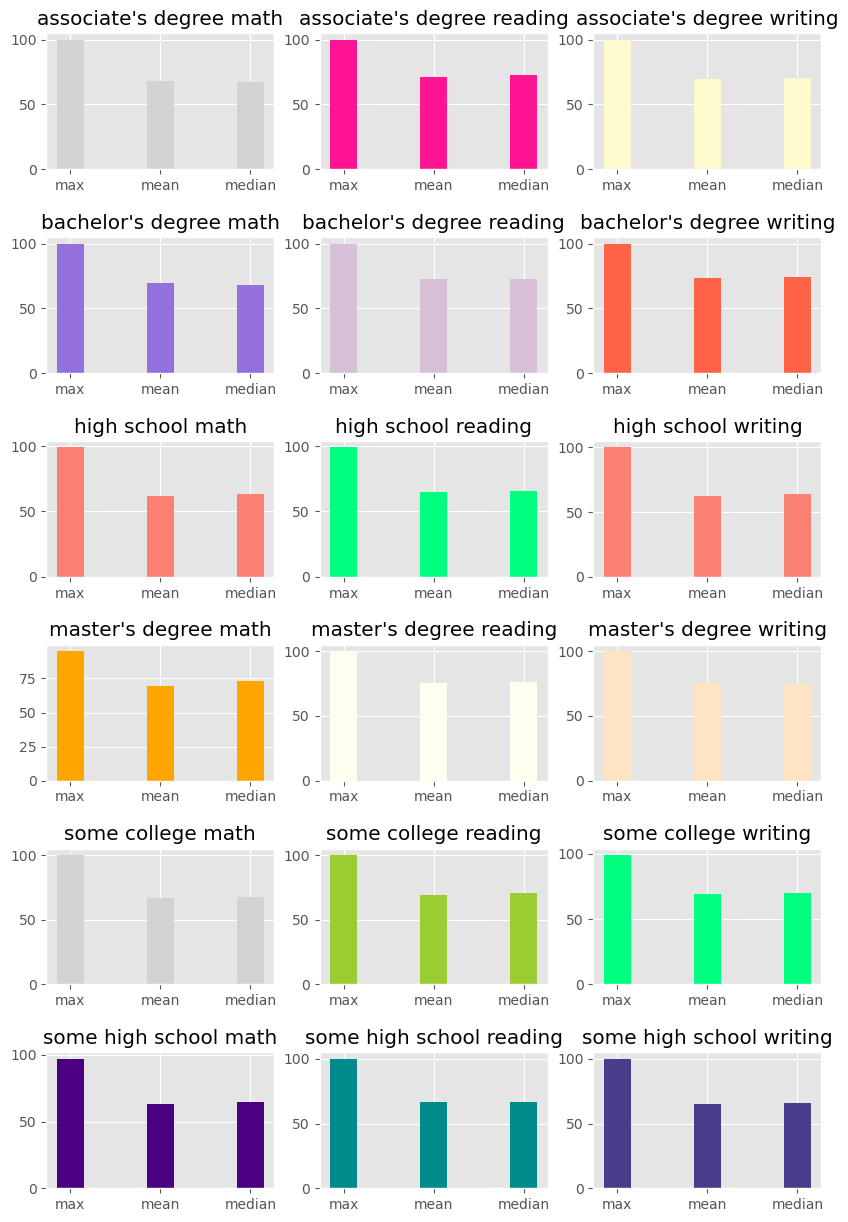

In [124]:
import matplotlib.colors as mcolors
all_colors = list(mcolors.CSS4_COLORS.keys())

agg_cols = ['max', 'mean', 'median']

fig, axs = plt.subplots(6, 3, figsize=(10, 15))

plt.subplots_adjust(hspace=0.5)
i, j = 0, 0
for degree in a.index:
    j = 0
    for score in scores:
        axs[i][j].bar(agg_cols, a.loc[degree][score], color=np.random.choice(all_colors), width=0.3)
        axs[i][j].set_title(degree + ' ' + score.replace('_score', ''))
        j += 1
    i += 1

Let construct hist graphic of scores

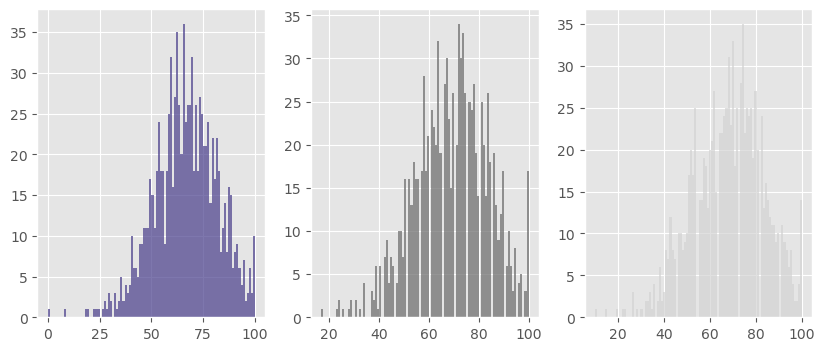

In [143]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i in range(3):
    axs[i].hist(data[scores[i]], bins=100, color=np.random.choice(all_colors), alpha=0.7)